In [4]:

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("museum_visitors.csv", encoding="cp1251")


In [5]:
#2 Завдання вивести перші 5 рядків датасету
df.head(5)

,Date,Avila Adobe,Firehouse Museum,Chinese American Museum,America Tropical Interpretive Center
0,2014-01-01,24778,4486,1581,6602
1,2014-02-01,18976,4172,1785,5029
2,2014-03-01,25231,7082,3229,8129
3,2014-04-01,26989,6756,2129,2824
4,2014-05-01,36883,10858,3676,10694


In [6]:
#3 Завдання провести попередній аналіз даних (визначити розмір датасету, тип даних, кількість пропусків).
print(df.shape)
print(df.dtypes)
print(df.isnull().sum())

(59, 5)
Date                                    object
Avila Adobe                              int64
Firehouse Museum                         int64
Chinese American Museum                  int64
America Tropical Interpretive Center     int64
dtype: object
Date                                    0
Avila Adobe                             0
Firehouse Museum                        0
Chinese American Museum                 0
America Tropical Interpretive Center    0
dtype: int64


In [7]:
#4 Завдання перевірити наявність дублікатів. Якщо є, видалити їх і вивести розмір таблиці (без дублікатів).
duplicates = df[df.duplicated()] 
print(duplicates)
# Видаляємо дублікати
df.drop_duplicates(inplace=True)
print(df.shape)

Empty DataFrame
Columns: [Date, Avila Adobe, Firehouse Museum, Chinese American Museum, America Tropical Interpretive Center]
Index: []
(59, 5)


In [8]:
#5 Завдання про які роки містить інформацію датасет.

df["year"] = df["Date"].str[:4] 
years = df["year"].unique()
print(years)

['2014' '2015' '2016' '2017' '2018']


In [9]:
#6 Змінити назви столбців. Замінити великі букви на маленьки, пробіли на підкреслення 
df.columns = df.columns.str.lower().str.replace(' ', '_')
print(df.columns)

Index(['date', 'avila_adobe', 'firehouse_museum', 'chinese_american_museum',
       'america_tropical_interpretive_center', 'year'],
      dtype='object')


In [10]:
#7 Завдання обчислити середню кількість відвідувачів для кожного музею протягом всього періоду.
museums = ["avila_adobe", "firehouse_museum", 
           "chinese_american_museum", 
           "america_tropical_interpretive_center"]

averages = df[museums].mean(axis=0) 

print(averages)

avila_adobe                             24061.661017
firehouse_museum                         6472.830508
chinese_american_museum                  2721.254237
america_tropical_interpretive_center     7107.016949
dtype: float64


In [11]:
#8 Завдання знайти мінімальну та максимальну кількість відвідувачів для кожного музею за 2018 рік
df["year"] = pd.to_numeric(df["year"])  

df_2018 = df[df["year"] == 2018]
df_2018.drop("date", axis=1, inplace=True)
grouped_df = df_2018.groupby(["year"])
max_df = grouped_df.max()
min_df = grouped_df.min()
print(max_df)
print(min_df)

      avila_adobe  firehouse_museum  chinese_american_museum  \
year                                                           
2018        25173              8013                     4960   

      america_tropical_interpretive_center  
year                                        
2018                                  5837  
      avila_adobe  firehouse_museum  chinese_american_museum  \
year                                                           
2018        14718              3306                     2146   

      america_tropical_interpretive_center  
year                                        
2018                                  3180  


C:\Users\KOMP\AppData\Local\Temp\ipykernel_9052\3172525503.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018.drop("date", axis=1, inplace=True)


In [12]:

#9 Завдання визначити місяці з найвищою і найнижчою загальною кількістю відвідувачів серед усіх музеїв для
#2015 року. Вивести назви місяців (не цифри).

df_2015 = df[df["year"] == 2015]
df_2015["date"] = pd.to_datetime(df_2015["date"])
df_2015["month"] = df_2015["date"].dt.strftime('%B')
df_2015.drop("date", axis=1, inplace=True)
df_2015["total_visitors"] = df_2015.sum(axis=1)

highest_month = df_2015["month"].iloc[df_2015["total_visitors"].argmax()]
lowest_month = df_2015["month"].iloc[df_2015["total_visitors"].argmin()]

print(f"Місяць з найвищою загальною кількістю відвідувачів: {highest_month}")
print(f"Місяць з найнижчою загальною кількістю відвідувачів: {lowest_month}")

C:\Users\KOMP\AppData\Local\Temp\ipykernel_9052\2411637316.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2015["date"] = pd.to_datetime(df_2015["date"])
C:\Users\KOMP\AppData\Local\Temp\ipykernel_9052\2411637316.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2015["month"] = df_2015["date"].dt.strftime('%B')
C:\Users\KOMP\AppData\Local\Temp\ipykernel_9052\2411637316.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documen

Місяць з найвищою загальною кількістю відвідувачів: May
Місяць з найнижчою загальною кількістю відвідувачів: February


In [13]:
#10 Завдання порівняти кількість відвідувачів музею "Avila Adobe" у літні і зимові місяці 2018 року

df_2018 = df[df["year"] == 2018]
df_2018["date"] = pd.to_datetime(df_2018["date"])
df_2018["month"] = df_2018["date"].dt.strftime("%B")
df_2018.drop("date", axis=1, inplace=True)
df_2018
summer_months = df_2018[df_2018["month"].isin(["June","July","August"])]
winter_months = df_2018[df_2018["month"].isin(["January","February"])]
summer_visitors = summer_months["avila_adobe"].sum()
winter_visitors = winter_months["avila_adobe"].sum()

print(f"Кількість відвідувачів музею 'Avila Adobe' у літні місяці: {summer_visitors}")
print(f"Кількість відвідувачів музею 'Avila Adobe' у зимові місяці: {winter_visitors}")

Кількість відвідувачів музею 'Avila Adobe' у літні місяці: 66122
Кількість відвідувачів музею 'Avila Adobe' у зимові місяці: 30983


C:\Users\KOMP\AppData\Local\Temp\ipykernel_9052\1992128628.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018["date"] = pd.to_datetime(df_2018["date"])
C:\Users\KOMP\AppData\Local\Temp\ipykernel_9052\1992128628.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018["month"] = df_2018["date"].dt.strftime("%B")
C:\Users\KOMP\AppData\Local\Temp\ipykernel_9052\1992128628.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documen

In [17]:
#11 Завдання знайти кореляцію між кількістю відвідувачів в кожному з музеїв  та датами у 2016 році

df_2016 = df[df["year"] == 2016]
df_2016["date"] = pd.to_datetime(df_2016["date"])
df_2016["month"] = df_2016["date"].dt.strftime("%B")

df_2016["date"] = df_2016["date"].dt.to_period("D").astype(int)
for museum in ["avila_adobe", "firehouse_museum", "chinese_american_museum", "america_tropical_interpretive_center"]:
    print(f"Кореляція між кількістю відвідувачів музею {museum} та датою: {df_2016[museum].corr(df_2016['date'])}")

C:\Users\KOMP\AppData\Local\Temp\ipykernel_9052\2135348159.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2016["date"] = pd.to_datetime(df_2016["date"])
C:\Users\KOMP\AppData\Local\Temp\ipykernel_9052\2135348159.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2016["month"] = df_2016["date"].dt.strftime("%B")
C:\Users\KOMP\AppData\Local\Temp\ipykernel_9052\2135348159.py:10: FutureWarning: The behavior of .astype from period[D] to int32 is deprecated. In a future version, this astype will retur

Кореляція між кількістю відвідувачів музею avila_adobe та датою: 0.06035048064118145
Кореляція між кількістю відвідувачів музею firehouse_museum та датою: -0.2016501181053196
Кореляція між кількістю відвідувачів музею chinese_american_museum та датою: -0.41503056831684215
Кореляція між кількістю відвідувачів музею america_tropical_interpretive_center та датою: -0.22817179845537433


C:\Users\KOMP\AppData\Local\Temp\ipykernel_9052\178027524.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_2016.corr()


<AxesSubplot:>

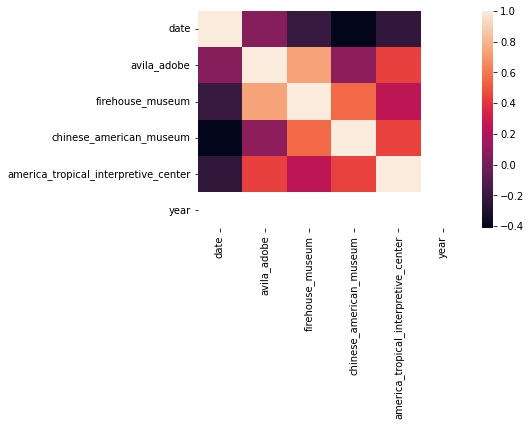

In [21]:
#12 Завдання побудувати теплокарту кореляції для попереднього завдання.

import seaborn as sns

corr = df_2016.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

C:\Users\KOMP\AppData\Local\Temp\ipykernel_9052\2595370224.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2017["date"] = pd.to_datetime(df_2017["date"])
C:\Users\KOMP\AppData\Local\Temp\ipykernel_9052\2595370224.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2017["month"] = df_2017["date"].dt.strftime("%B")
C:\Users\KOMP\AppData\Local\Temp\ipykernel_9052\2595370224.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documen

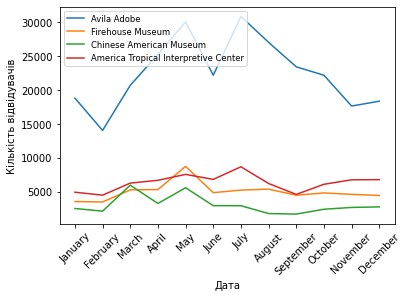

In [22]:
#13 Завдання побудувати графік ліній для кожного музею, показуючи їхню відвідуваність протягом 2017 року.

df_2017 = df[df["year"] == 2017]
df_2017["date"] = pd.to_datetime(df_2017["date"])
df_2017["month"] = df_2017["date"].dt.strftime("%B")
df_2017.drop("date", axis=1, inplace=True)
for museum in ["avila_adobe", "firehouse_museum", "chinese_american_museum", "america_tropical_interpretive_center"]:
    series = df_2017[["month", museum]].set_index("month")
    plt.plot(series)
    plt.xlabel("Дата")
    plt.xticks(rotation=45)
    plt.ylabel("Кількість відвідувачів")
    plt.legend(["Avila Adobe", "Firehouse Museum", "Chinese American Museum", "America Tropical Interpretive Center"], loc="upper left", fontsize="small")

plt.show()

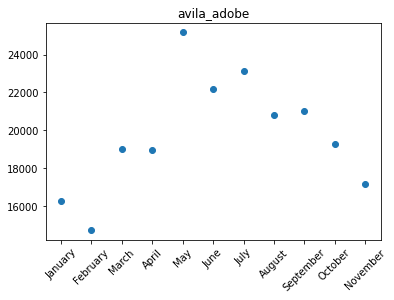

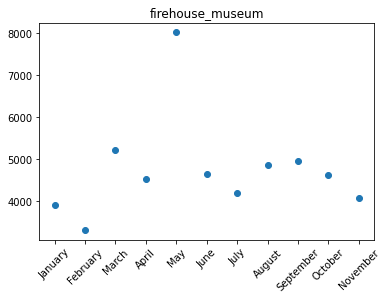

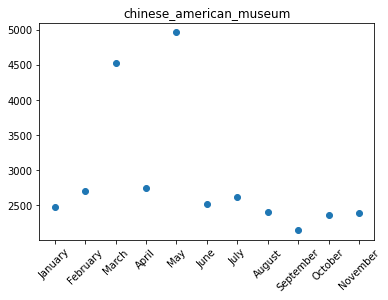

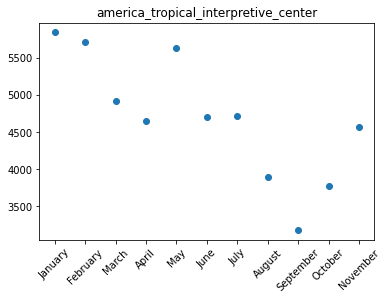

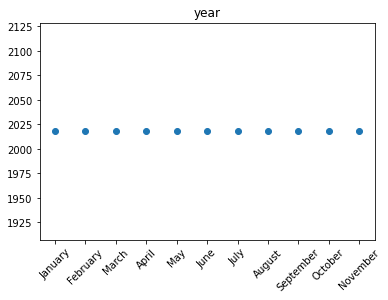

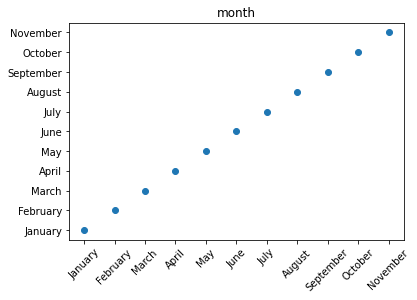

In [23]:
# 14 Завдання побудувати графіки розсіювання для кожного музею за 2018 рік

for museum in df_2018.columns:
    plt.scatter(df_2018["month"], df_2018[museum])
    plt.title(museum)
    plt.xticks( rotation=45)
    plt.show()

C:\Users\KOMP\AppData\Local\Temp\ipykernel_9052\1143183604.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2014["date"] = pd.to_datetime(df_2014["date"])
C:\Users\KOMP\AppData\Local\Temp\ipykernel_9052\1143183604.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2014["month"] = df_2014["date"].dt.strftime("%B")
C:\Users\KOMP\AppData\Local\Temp\ipykernel_9052\1143183604.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docume

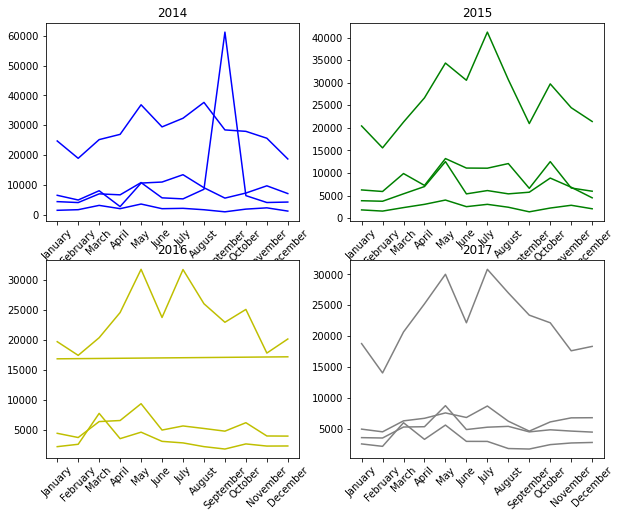

In [26]:
#15 Завдання гістограма відвідуваності за місяцями кожного музею. Вивести 4 графіки: за 2014, 2015, 2016, 2017 роки.
#ці графіки розташовані два зверху, два знизу, колір 1 графіка - синій, 2 - зелений, 3 - жовтий, 4 - сірий.

fig, ax = plt.subplots(2, 2, figsize=(10,8))

# 2014
df_2014 = df[df["year"] == 2014]
df_2014["date"] = pd.to_datetime(df_2014["date"])
df_2014["month"] = df_2014["date"].dt.strftime("%B")
df_2014.drop("date", axis=1, inplace=True)
museums_2014 = df_2014.columns[0:4]
ax[0,0].set_title("2014")  
for museum in museums_2014:
  ax[0,0].plot(df_2014["month"], df_2014[museum], color="b")

# 2015
museums_2015 = df_2015.columns[0:4]  
ax[0,1].set_title("2015")
for museum in museums_2015:
  ax[0,1].plot(df_2015["month"], df_2015[museum], color="g")

# 2016 
museums_2016 = df_2016.columns[0:4]
ax[1,0].set_title("2016")
for museum in museums_2016:
  ax[1,0].plot(df_2016["month"], df_2016[museum], color="y")
# 2017
museums_2017 = df_2017.columns[0:4]
ax[1,1].set_title("2017")  
for museum in museums_2017:
  ax[1,1].plot(df_2017["month"], df_2017[museum], color="gray")

for tick in ax[0,0].xaxis.get_major_ticks():
    tick.label.set_rotation(45)

for tick in ax[0,1].xaxis.get_major_ticks():
    tick.label.set_rotation(45)
    
for tick in ax[1,0].xaxis.get_major_ticks():
    tick.label.set_rotation(45)
    
for tick in ax[1,1].xaxis.get_major_ticks():
    tick.label.set_rotation(45)